<a href="https://colab.research.google.com/github/Jeff-004/Projects/blob/main/Retail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the Excel file (update the file path if needed)
df = pd.read_excel('/content/drive/MyDrive/Datasets/Online Retail.xlsx')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [15]:
# Check for missing values

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [16]:

# Drop rows with missing CustomerID or Description
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add useful time-based columns
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [18]:
# Calculate IQR for Quantity
Q1_q = df['Quantity'].quantile(0.25)
Q3_q = df['Quantity'].quantile(0.75)
IQR_q = Q3_q - Q1_q
lower_bound_q = Q1_q - 1.5 * IQR_q
upper_bound_q = Q3_q + 1.5 * IQR_q

# Calculate IQR for UnitPrice
Q1_p = df['UnitPrice'].quantile(0.25)
Q3_p = df['UnitPrice'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p

# Filter out outliers in both Quantity and UnitPrice
df_clean = df[
    (df['Quantity'] >= lower_bound_q) & (df['Quantity'] <= upper_bound_q) &
    (df['UnitPrice'] >= lower_bound_p) & (df['UnitPrice'] <= upper_bound_p)
].copy()

print(f"\nOriginal shape: {df.shape}, After outlier removal: {df_clean.shape}")



Original shape: (401604, 10), After outlier removal: (339453, 10)


In [19]:
#Basic Statistics
print("Basic statistics (after outlier removal):")
print(df_clean[['Quantity', 'UnitPrice']].describe())

Basic statistics (after outlier removal):
            Quantity      UnitPrice
count  339453.000000  339453.000000
mean        7.350022       2.203459
std         6.890369       1.549676
min       -13.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.650000
75%        12.000000       2.950000
max        27.000000       7.500000


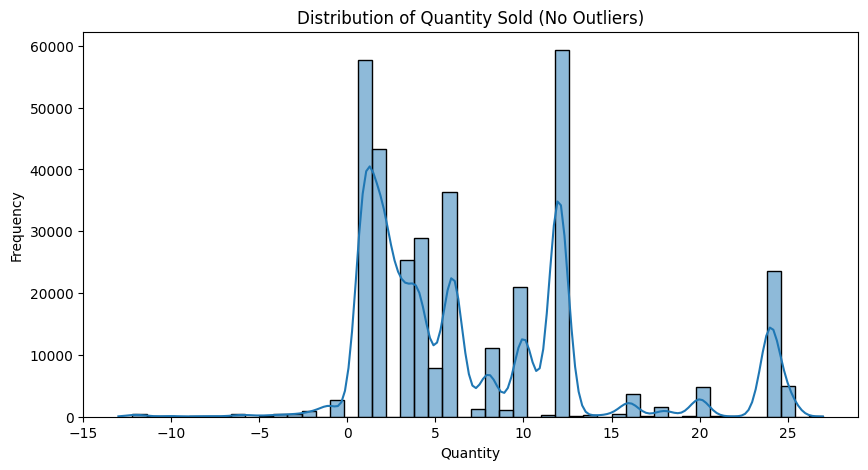

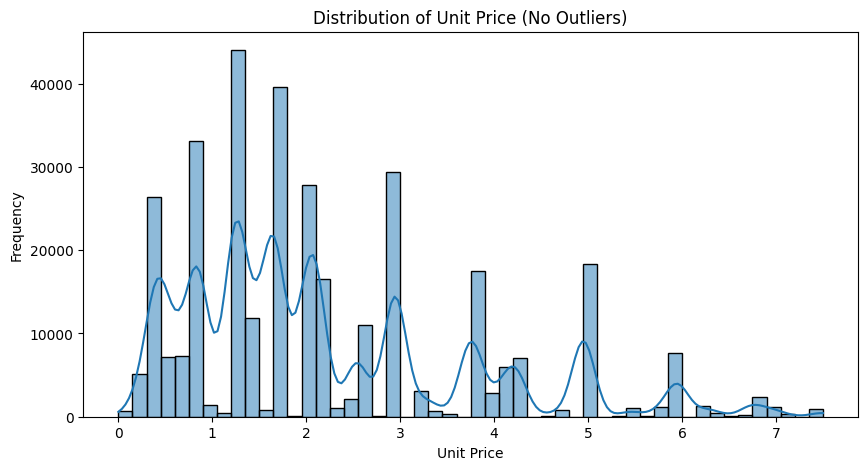

In [20]:
#Visualization
plt.figure(figsize=(10,5))
sns.histplot(df_clean['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity Sold (No Outliers)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df_clean['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price (No Outliers)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


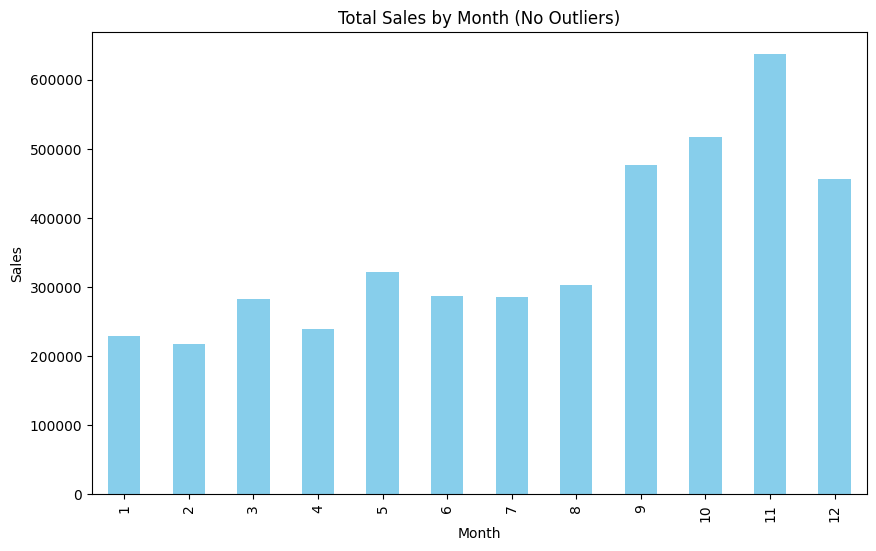

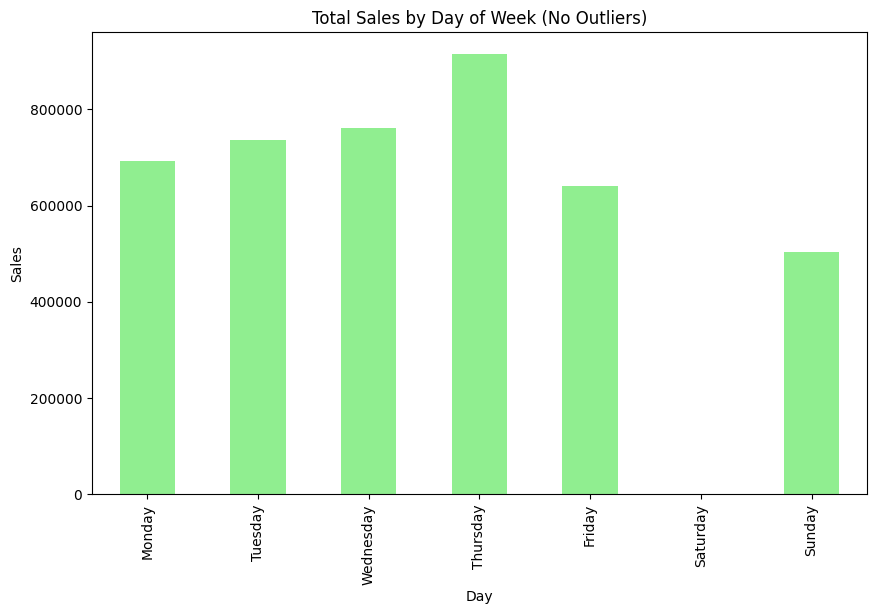

In [21]:
# Calculate sales
df_clean['Sales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Monthly sales
monthly_sales_clean = df_clean.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,6))
monthly_sales_clean.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month (No Outliers)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Weekday sales
weekday_sales_clean = df_clean.groupby('DayOfWeek')['Sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10,6))
weekday_sales_clean.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Day of Week (No Outliers)')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()


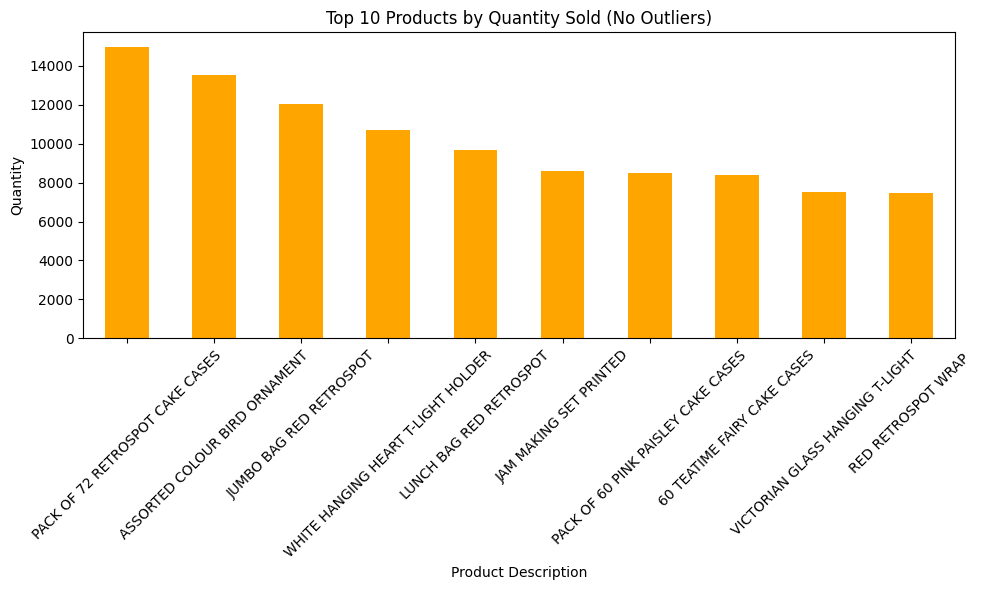

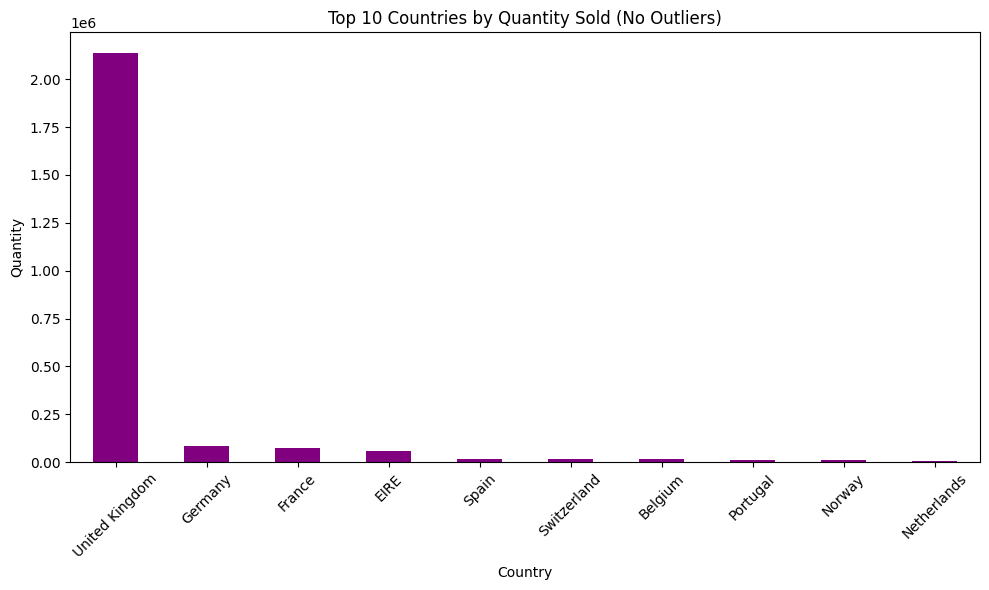

In [22]:
# Top products
top_products_clean = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products_clean.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Quantity Sold (No Outliers)')
plt.ylabel('Quantity')
plt.xlabel('Product Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top countries
top_countries_clean = df_clean.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_countries_clean.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Quantity Sold (No Outliers)')
plt.ylabel('Quantity')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


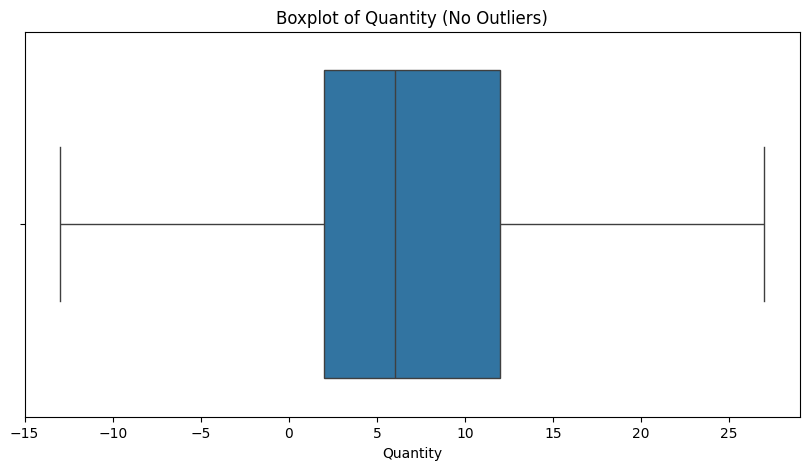

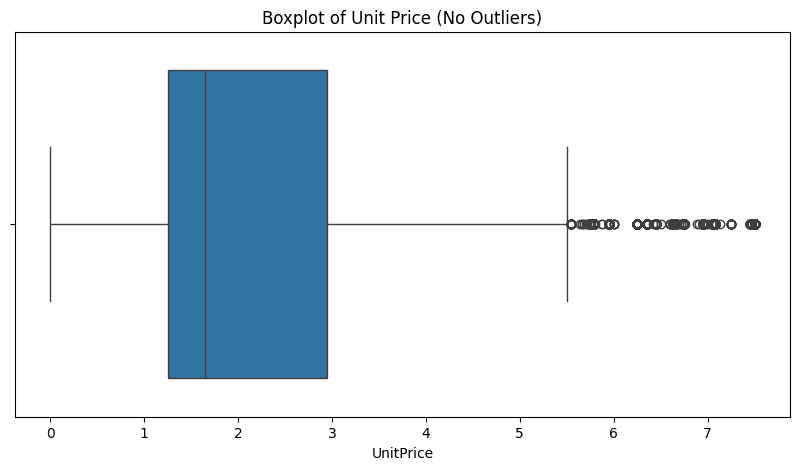

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clean['Quantity'])
plt.title("Boxplot of Quantity (No Outliers)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clean['UnitPrice'])
plt.title("Boxplot of Unit Price (No Outliers)")
plt.show()


In [24]:
#Final Summary
print("\nSummary (after outlier removal):")
print("- Cleaned dataset shape:", df_clean.shape)
print("- Highest sales occurred in month:", monthly_sales_clean.idxmax())
print("- Busiest day of the week:", weekday_sales_clean.idxmax())
print("- Top-selling product:", top_products_clean.idxmax())
print("- Country with highest quantity sold:", top_countries_clean.idxmax())



Summary (after outlier removal):
- Cleaned dataset shape: (339453, 11)
- Highest sales occurred in month: 11
- Busiest day of the week: Thursday
- Top-selling product: PACK OF 72 RETROSPOT CAKE CASES
- Country with highest quantity sold: United Kingdom
